In [1]:
import pandas as pd
import numpy as np

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


## Splitting & Using RF+DT - Stacking


In [5]:

import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# k_folds = 5
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
# cross_val_results_rf = cross_val_score(random_forest, X_train, y_train, cv=kf)

# print(f"Random Forest Cross-Validation Results: {cross_val_results_rf}")
# print(f"Random Forest Mean Accuracy: {cross_val_results_rf.mean():.2f}")

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# cross_val_results_dt = cross_val_score(decision_tree, X_train, y_train, cv=kf)

# print(f"Decision Tree Cross-Validation Results: {cross_val_results_dt}")
# print(f"Decision Tree Mean Accuracy: {cross_val_results_dt.mean():.2f}")

# Stacking
base_models = [
    ('random_forest', random_forest),
    ('decision_tree', decision_tree)
]

stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42))

# cv_scores_stacking = cross_val_score(stacking_model, X_train, y_train, cv=kf)

# print(f"Stacking Cross-Validation Results: {cv_scores_stacking}")
# print(f"Stacking Mean Accuracy: {cv_scores_stacking.mean():.2f}")

# Timing Comparison
start_time = time.time()
random_forest.fit(X_train, y_train)
end_time = time.time()
training_time_rf = end_time - start_time

start_time = time.time()
decision_tree.fit(X_train, y_train)
end_time = time.time()
training_time_dt = end_time - start_time

start_time = time.time()
stacking_model.fit(X_train, y_train)
end_time = time.time()
training_time_stacking = end_time - start_time

print(f"Random Forest Training time: {training_time_rf:.2f} seconds")
print(f"Decision Tree Training time: {training_time_dt:.2f} seconds")
print(f"Stacking Training time: {training_time_stacking:.2f} seconds")

# Evaluate on Test Set
accuracy_rf = random_forest.score(X_test, y_test)
accuracy_dt = decision_tree.score(X_test, y_test)
accuracy_stacking = stacking_model.score(X_test, y_test)

# print(f"Random Forest Test Accuracy: {accuracy_rf:.2f}")
# print(f"Decision Tree Test Accuracy: {accuracy_dt:.2f}")
print(f"Stacking Test Accuracy: {accuracy_stacking:.2f}")


Random Forest Training time: 0.25 seconds
Decision Tree Training time: 0.01 seconds
Stacking Training time: 1.60 seconds
Stacking Test Accuracy: 0.93


## Using Evaluation Metrics


Metrics for Random Forest:
Accuracy =  94.60093896713614 %
Precision =  0.9166177908113392
Recall =  0.8928804882468676
F1-score =  0.903036686182797


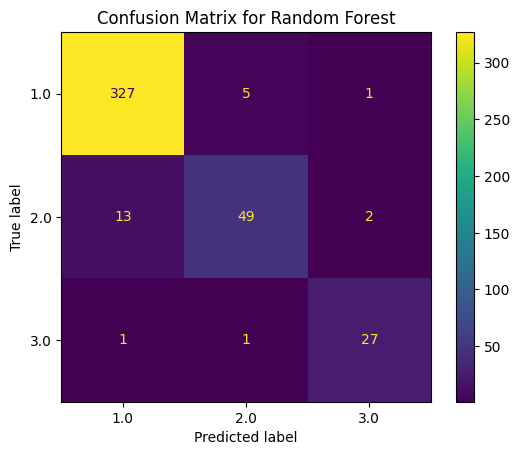

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.89      0.77      0.82        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.92      0.89      0.90       426
weighted avg       0.94      0.95      0.94       426


Metrics for Decision Tree:
Accuracy =  92.25352112676056 %
Precision =  0.8806582481117164
Recall =  0.8954924752338544
F1-score =  0.8876883376472899


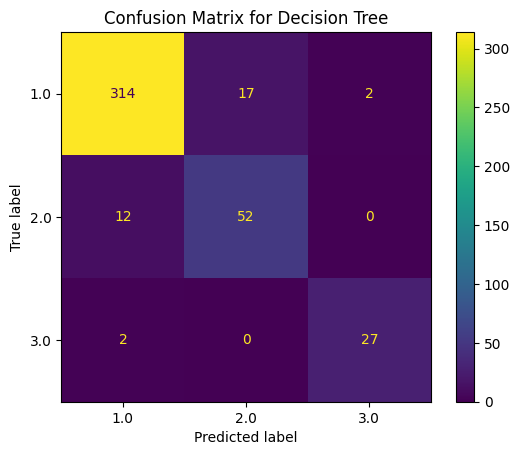

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       333
         2.0       0.75      0.81      0.78        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.92       426
   macro avg       0.88      0.90      0.89       426
weighted avg       0.92      0.92      0.92       426


Metrics for Stacking:
Accuracy =  93.42723004694837 %
Precision =  0.8902127934385998
Recall =  0.9025760674467572
F1-score =  0.8959816959816959


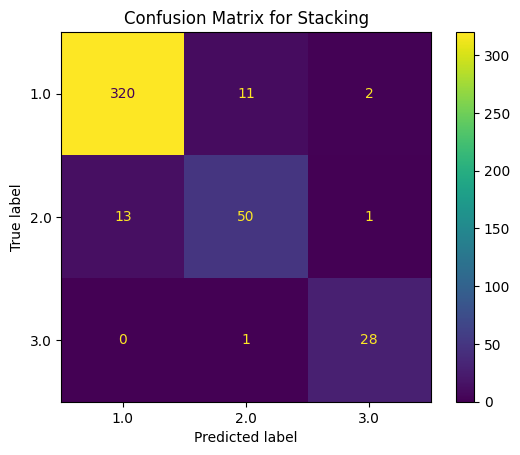

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       333
         2.0       0.81      0.78      0.79        64
         3.0       0.90      0.97      0.93        29

    accuracy                           0.93       426
   macro avg       0.89      0.90      0.90       426
weighted avg       0.93      0.93      0.93       426



In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier


# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Stacking
base_models = [
    ('random_forest', random_forest),
    ('decision_tree', decision_tree)
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42))
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

# Evaluation Metrics
models = {
    'Random Forest': y_pred_rf,
    'Decision Tree': y_pred_dt,
    'Stacking': y_pred_stacking
}

for model_name, y_pred in models.items():
    print(f"\nMetrics for {model_name}:")
    print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
    print("Precision = ", precision_score(y_test, y_pred, average='macro'))
    print("Recall = ", recall_score(y_test, y_pred, average='macro'))
    print("F1-score = ", f1_score(y_test, y_pred, average='macro'))

    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_train))
    disp.plot()
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    print("Classification Report")
    print(classification_report(y_test, y_pred))


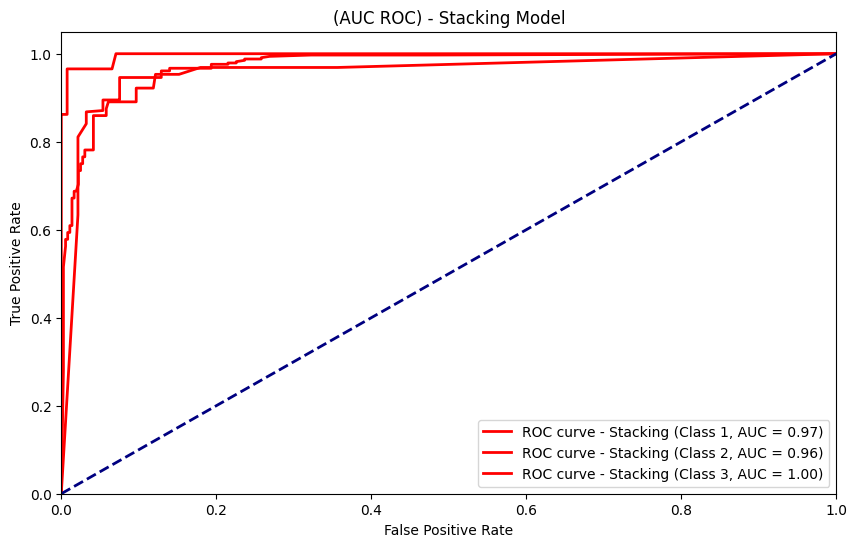

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Stacking
base_models = [
    ('random_forest', random_forest),
    ('decision_tree', decision_tree)
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42))
stacking_model.fit(X_train, y_train)
y_scores_stacking = stacking_model.predict_proba(X_test)

n_classes = len(np.unique(y))
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

plt.figure(figsize=(10, 6))

for i in range(n_classes):
    fpr_stacking, tpr_stacking, _ = roc_curve(y_test_binarized[:, i], y_scores_stacking[:, i])
    roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

    plt.plot(fpr_stacking, tpr_stacking, color='r', lw=2, label=f'ROC curve - Stacking (Class {i + 1}, AUC = {roc_auc_stacking:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Stacking Model')
plt.legend(loc="lower right")
plt.show()


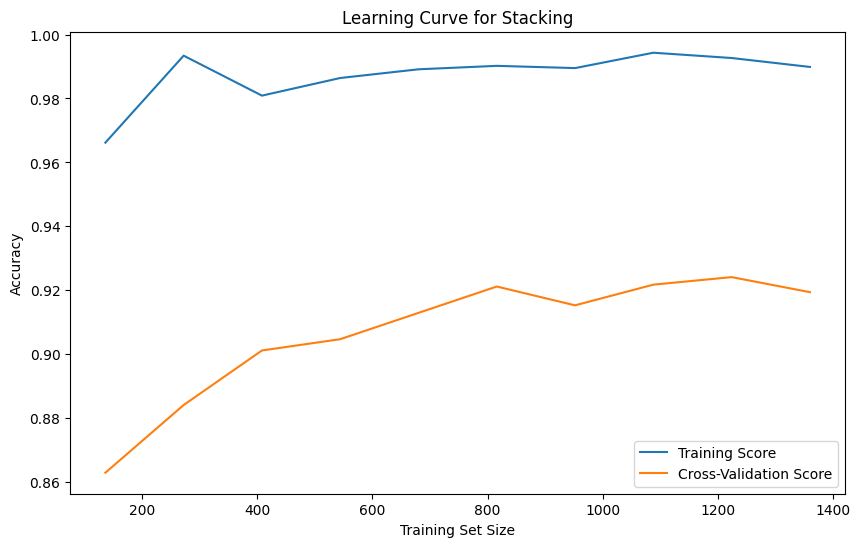

In [8]:


models = {
    'Stacking': y_pred_stacking
}
for model_name, y_pred in models.items():

    train_sizes, train_scores, test_scores = learning_curve(
        stacking_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {model_name}')
    plt.legend()
    plt.show()

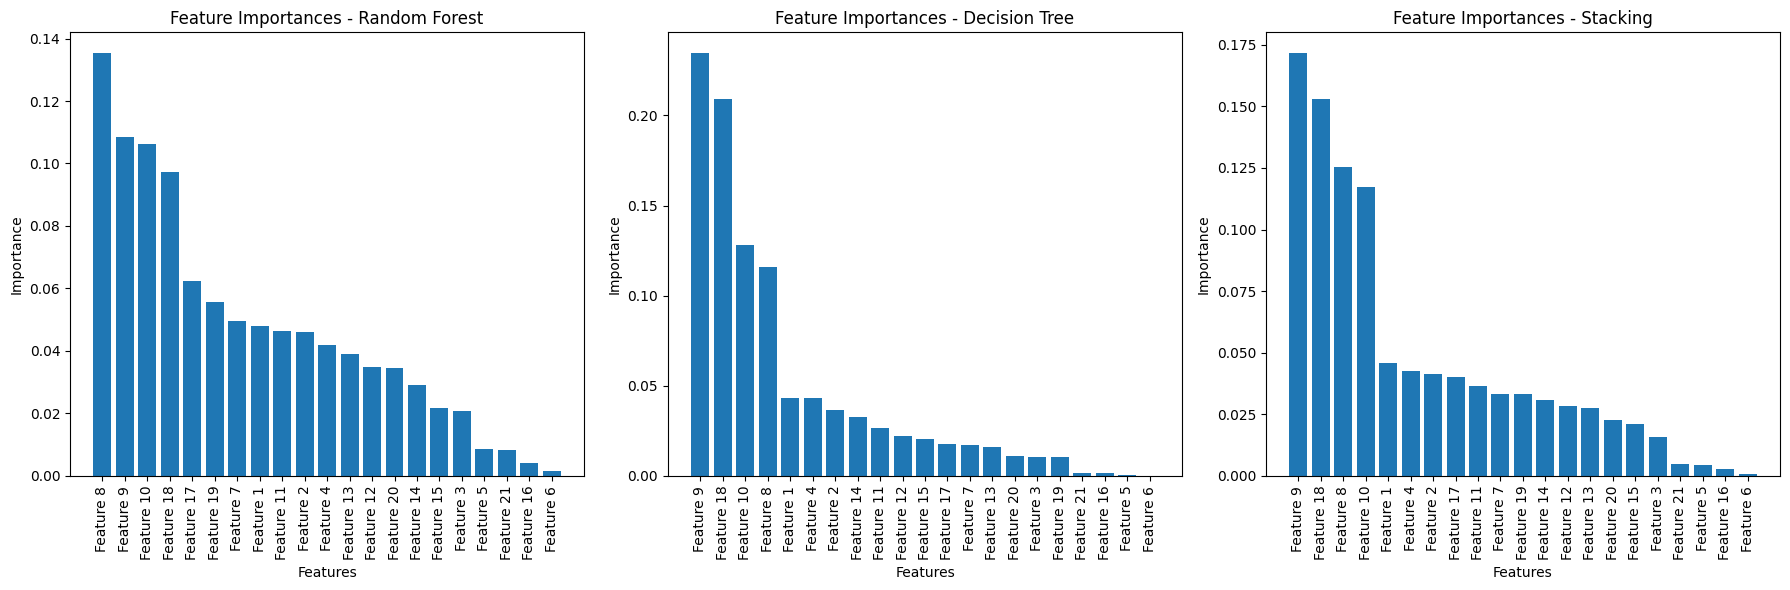

In [9]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
feature_importances_rf = random_forest.feature_importances_

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
feature_importances_dt = decision_tree.feature_importances_

# Stacking
base_models = [
    ('random_forest', random_forest),
    ('decision_tree', decision_tree)
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42))
stacking_model.fit(X_train, y_train)
feature_importances_stacking = np.mean([estimator.feature_importances_ for estimator in stacking_model.estimators_], axis=0)

# Plotting
feature_names = [f"Feature {i+1}" for i in range(len(feature_importances_rf))]
sorted_idx_rf = feature_importances_rf.argsort()[::-1]

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.bar(range(len(feature_importances_rf)), feature_importances_rf[sorted_idx_rf], align="center")
plt.xticks(range(len(feature_importances_rf)), [feature_names[i] for i in sorted_idx_rf], rotation='vertical')
plt.title("Feature Importances - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")

feature_names = [f"Feature {i+1}" for i in range(len(feature_importances_dt))]
sorted_idx_dt = feature_importances_dt.argsort()[::-1]

plt.subplot(1, 3, 2)
plt.bar(range(len(feature_importances_dt)), feature_importances_dt[sorted_idx_dt], align="center")
plt.xticks(range(len(feature_importances_dt)), [feature_names[i] for i in sorted_idx_dt], rotation='vertical')
plt.title("Feature Importances - Decision Tree")
plt.xlabel("Features")
plt.ylabel("Importance")

feature_names = [f"Feature {i+1}" for i in range(len(feature_importances_stacking))]
sorted_idx_stacking = feature_importances_stacking.argsort()[::-1]

plt.subplot(1, 3, 3)
plt.bar(range(len(feature_importances_stacking)), feature_importances_stacking[sorted_idx_stacking], align="center")
plt.xticks(range(len(feature_importances_stacking)), [feature_names[i] for i in sorted_idx_stacking], rotation='vertical')
plt.title("Feature Importances - Stacking")
plt.xlabel("Features")
plt.ylabel("Importance")

plt.tight_layout()
plt.show()


In [10]:
top_k_features_indices = sorted_idx_stacking[:8]
print("Indices of Important Features:", top_k_features_indices)

X_selected = X.iloc[:, top_k_features_indices]

Indices of Important Features: [ 8 17  7  9  0  3  1 16]


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


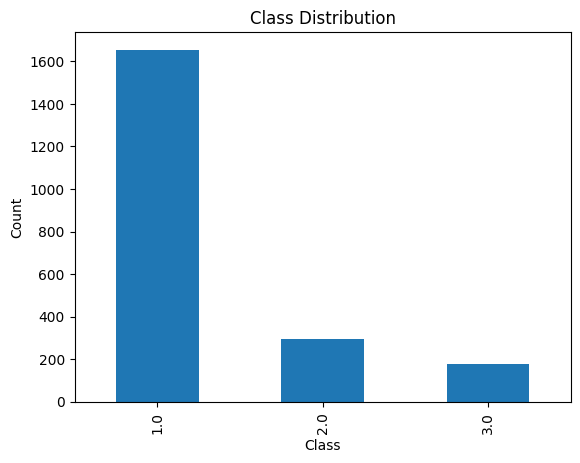

In [11]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)


print("Feature names during training:", X_resampled.columns)
print("Feature names in the test set:", X_test.columns)
X_test_aligned = X_test[X_resampled.columns]

Feature names during training: Index(['mean_value_of_short_term_variability', 'histogram_mean',
       'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'baseline value', 'uterine_contractions', 'accelerations',
       'histogram_mode'],
      dtype='object')
Feature names in the test set: Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency'],
      dtype='object')


Class Distribution:
fetal_health
2.0    1655
1.0    1655
3.0    1655
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


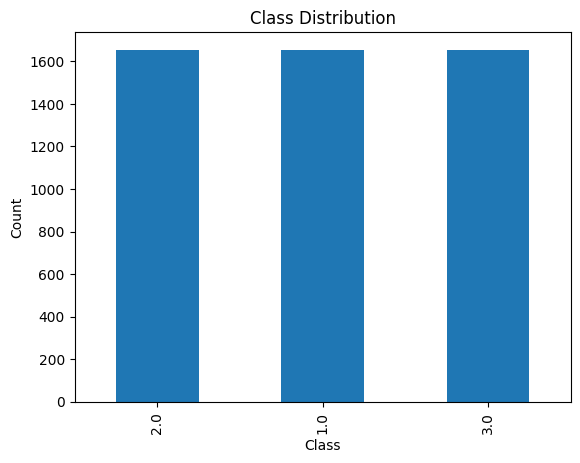

In [13]:


class_distribution = y_resampled.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using RF+DT - Stacking

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import numpy as np

# Decision Tree
decision_tree_after = DecisionTreeClassifier(random_state=42)
decision_tree_after.fit(X_resampled, y_resampled)

# Random Forest
random_forest_after = RandomForestClassifier(random_state=42)
random_forest_after.fit(X_resampled, y_resampled)

# Stacking with Decision Tree and Random Forest as base models
base_models = [
    ('decision_tree', decision_tree_after),
    ('random_forest', random_forest_after)
]

# Using CatBoost as the meta-estimator
stacking_model = StackingClassifier(estimators=base_models, final_estimator=CatBoostClassifier(random_state=42, verbose=0))

# Stratified Cross-Validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in stratified_cv.split(X_resampled, y_resampled):
    X_train_fold, X_val_fold = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train_fold, y_val_fold = y_resampled[train_index], y_resampled[test_index]

    # Training base models
    decision_tree_after.fit(X_train_fold, y_train_fold)
    random_forest_after.fit(X_train_fold, y_train_fold)

    # Stacking
    stacking_model.fit(X_train_fold, y_train_fold)

    # Predictions on validation set
    y_pred_val_dt = decision_tree_after.predict(X_val_fold)
    y_pred_val_rf = random_forest_after.predict(X_val_fold)
    y_pred_val_stack = stacking_model.predict(X_val_fold)

    # Evaluate the models on validation set
    accuracy_dt = accuracy_score(y_val_fold, y_pred_val_dt)
    accuracy_rf = accuracy_score(y_val_fold, y_pred_val_rf)
    accuracy_stack = accuracy_score(y_val_fold, y_pred_val_stack)

    print(f"Decision Tree Accuracy: {accuracy_dt}")
    print(f"Random Forest Accuracy: {accuracy_rf}")
    print(f"Stacking Accuracy: {accuracy_stack}")

# Predictions on the full training set
y_pred_full_dt = decision_tree_after.predict(X_resampled)
y_pred_full_rf = random_forest_after.predict(X_resampled)
y_pred_full_stack = stacking_model.predict(X_resampled)

# Predictions on the test set
y_pred_test_dt = decision_tree_after.predict(X_test_aligned)
y_pred_test_rf = random_forest_after.predict(X_test_aligned)
y_pred_test_stack = stacking_model.predict(X_test_aligned)

# Convert labels if needed
y_test_converted = y_test - 1


C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree Accuracy: 0.9617321248741189
Random Forest Accuracy: 0.9768378650553877
Stacking Accuracy: 0.9627391742195368


C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree Accuracy: 0.9637462235649547
Random Forest Accuracy: 0.973816717019134
Stacking Accuracy: 0.9707955689828801


C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree Accuracy: 0.9566968781470292
Random Forest Accuracy: 0.9718026183282981
Stacking Accuracy: 0.9536757301107754


C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree Accuracy: 0.9546827794561934
Random Forest Accuracy: 0.9667673716012085
Stacking Accuracy: 0.959718026183283


C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree Accuracy: 0.9697885196374623
Random Forest Accuracy: 0.9838872104733132
Stacking Accuracy: 0.9748237663645518


C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Holdout Score (Stacking): 0.9577039274924471


C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

k-Fold CV (Stacking): 0.9585107784097028


C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Stratified k-Fold CV (Stacking): 0.9645515343322161


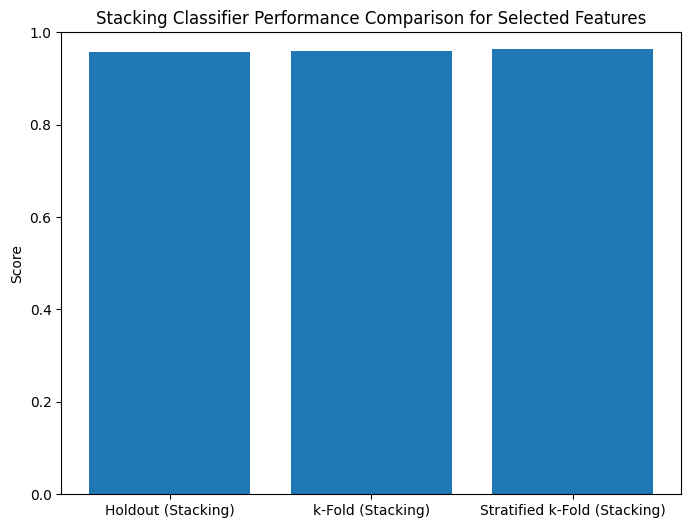

In [15]:
cv_scores_holdout_stack = []
cv_scores_kfold_stack = []
cv_scores_stratified_kfold_stack = []

# Holdout
X_train, X_holdout, y_train, y_holdout = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
stacking_model.fit(X_train, y_train)
score_holdout = stacking_model.score(X_holdout, y_holdout)
cv_scores_holdout_stack.append(score_holdout)
print(f'Holdout Score (Stacking): {score_holdout}')

# k-Fold
kf_stack = KFold(n_splits=4, shuffle=True, random_state=42)
scores_kfold_stack = cross_val_score(stacking_model, X_resampled, y_resampled, cv=kf_stack, scoring='accuracy')
cv_scores_kfold_stack.append(scores_kfold_stack.mean())
print(f'k-Fold CV (Stacking): {scores_kfold_stack.mean()}')

# Stratified k-Fold
skf_stack = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
scores_stratified_kfold_stack = cross_val_score(stacking_model, X_resampled, y_resampled, cv=skf_stack, scoring='accuracy')
cv_scores_stratified_kfold_stack.append(scores_stratified_kfold_stack.mean())
print(f'Stratified k-Fold CV (Stacking): {scores_stratified_kfold_stack.mean()}')

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(['Holdout (Stacking)', 'k-Fold (Stacking)', 'Stratified k-Fold (Stacking)'],
        [cv_scores_holdout_stack[0], cv_scores_kfold_stack[0], cv_scores_stratified_kfold_stack[0]])
plt.title(f'Stacking Classifier Performance Comparison for Selected Features')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.show()


## Using Evaluation Metrics

<Figure size 800x600 with 0 Axes>

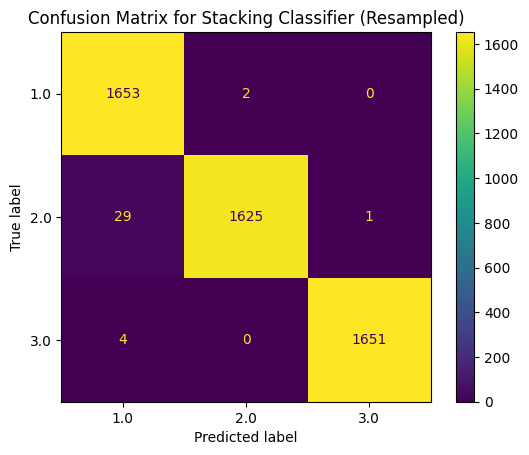

Accuracy (Stacking - Resampled): 99.2749244712991 %
Precision (macro, Stacking - Resampled): 0.9928641543622979
Recall (macro, Stacking - Resampled): 0.992749244712991
F1-score (macro, Stacking - Resampled): 0.9927539992919608
Classification Report (Stacking - Resampled):
              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99      1655
         2.0       1.00      0.98      0.99      1655
         3.0       1.00      1.00      1.00      1655

    accuracy                           0.99      4965
   macro avg       0.99      0.99      0.99      4965
weighted avg       0.99      0.99      0.99      4965



<Figure size 800x600 with 0 Axes>

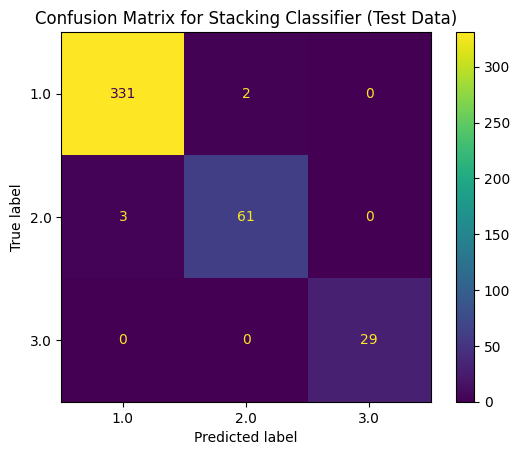

Accuracy (Stacking - Test): 98.82629107981221 %
Precision (macro, Stacking - Test): 0.9864239774419415
Recall (macro, Stacking - Test): 0.9823729979979979
F1-score (macro, Stacking - Test): 0.9843778897952599
Classification Report (Stacking - Test):
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       333
         2.0       0.97      0.95      0.96        64
         3.0       1.00      1.00      1.00        29

    accuracy                           0.99       426
   macro avg       0.99      0.98      0.98       426
weighted avg       0.99      0.99      0.99       426



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluation metrics for Stacking Classifier on resampled data
accuracy_stacking_resampled = accuracy_score(y_resampled, y_pred_full_stack)
precision_stacking_resampled = precision_score(y_resampled, y_pred_full_stack, average='macro')
recall_stacking_resampled = recall_score(y_resampled, y_pred_full_stack, average='macro')
f1_stacking_resampled = f1_score(y_resampled, y_pred_full_stack, average='macro')

conf_matrix_stacking_resampled = confusion_matrix(y_resampled, y_pred_full_stack)
class_report_stacking_resampled = classification_report(y_resampled, y_pred_full_stack)

# Plotting Confusion Matrix for Stacking Classifier on resampled data
plt.figure(figsize=(8, 6))
disp_stack_resampled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_stacking_resampled, display_labels=np.unique(y))
disp_stack_resampled.plot()
plt.title('Confusion Matrix for Stacking Classifier (Resampled)')
plt.show()

print("Accuracy (Stacking - Resampled):", accuracy_stacking_resampled * 100, "%")
print("Precision (macro, Stacking - Resampled):", precision_stacking_resampled)
print("Recall (macro, Stacking - Resampled):", recall_stacking_resampled)
print("F1-score (macro, Stacking - Resampled):", f1_stacking_resampled)
print("Classification Report (Stacking - Resampled):")
print(class_report_stacking_resampled)

# Evaluation metrics for Stacking Classifier on test data
accuracy_stacking_test = accuracy_score(y_test, y_pred_test_stack)
precision_stacking_test = precision_score(y_test, y_pred_test_stack, average='macro')
recall_stacking_test = recall_score(y_test, y_pred_test_stack, average='macro')
f1_stacking_test = f1_score(y_test, y_pred_test_stack, average='macro')

conf_matrix_stacking_test = confusion_matrix(y_test, y_pred_test_stack)
class_report_stacking_test = classification_report(y_test, y_pred_test_stack)

# Plotting Confusion Matrix for Stacking Classifier on test data
plt.figure(figsize=(8, 6))
disp_stack_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_stacking_test, display_labels=np.unique(y))
disp_stack_test.plot()
plt.title('Confusion Matrix for Stacking Classifier (Test Data)')
plt.show()

print("Accuracy (Stacking - Test):", accuracy_stacking_test * 100, "%")
print("Precision (macro, Stacking - Test):", precision_stacking_test)
print("Recall (macro, Stacking - Test):", recall_stacking_test)
print("F1-score (macro, Stacking - Test):", f1_stacking_test)
print("Classification Report (Stacking - Test):")
print(class_report_stacking_test)


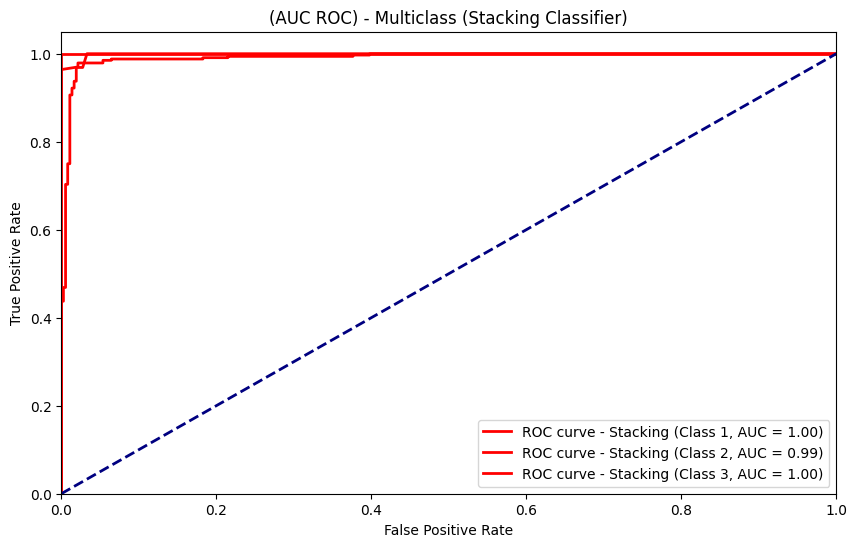

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_test_binarized = label_binarize(y_test, classes=np.unique(y))

y_scores_stacking = stacking_model.predict_proba(X_test_aligned)

plt.figure(figsize=(10, 6))

n_classes = len(np.unique(y))

colors = ['b', 'g', 'r']

# Plotting ROC curves for Stacking Classifier
for i in range(n_classes):
    fpr_stacking, tpr_stacking, _ = roc_curve(y_test_binarized[:, i], y_scores_stacking[:, i])
    roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

    plt.plot(fpr_stacking, tpr_stacking, color='r', lw=2, label=f'ROC curve - Stacking (Class {i + 1}, AUC = {roc_auc_stacking:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass (Stacking Classifier)')
plt.legend(loc="lower right")
plt.show()


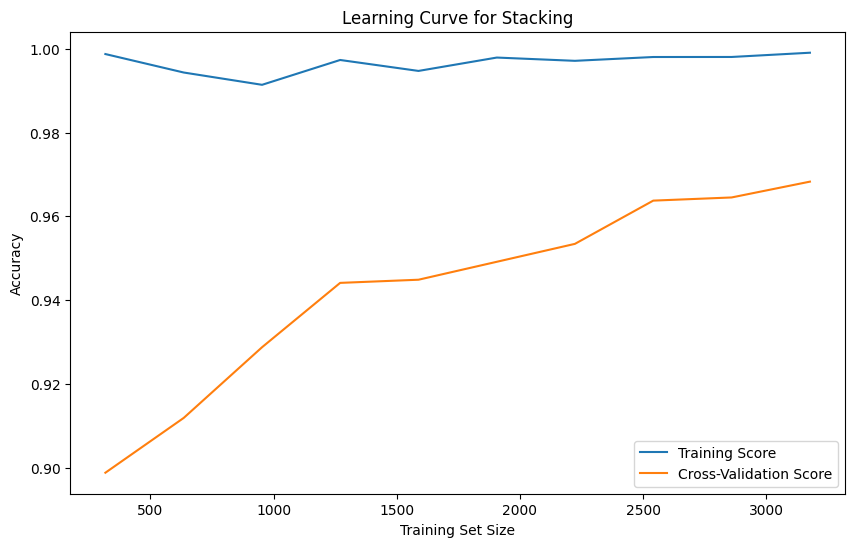

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve



models = {
    'Stacking': y_pred_test_stack
}
for model_name, y_pred in models.items():

    train_sizes, train_scores, test_scores = learning_curve(
        stacking_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {model_name}')
    plt.legend()
    plt.show()


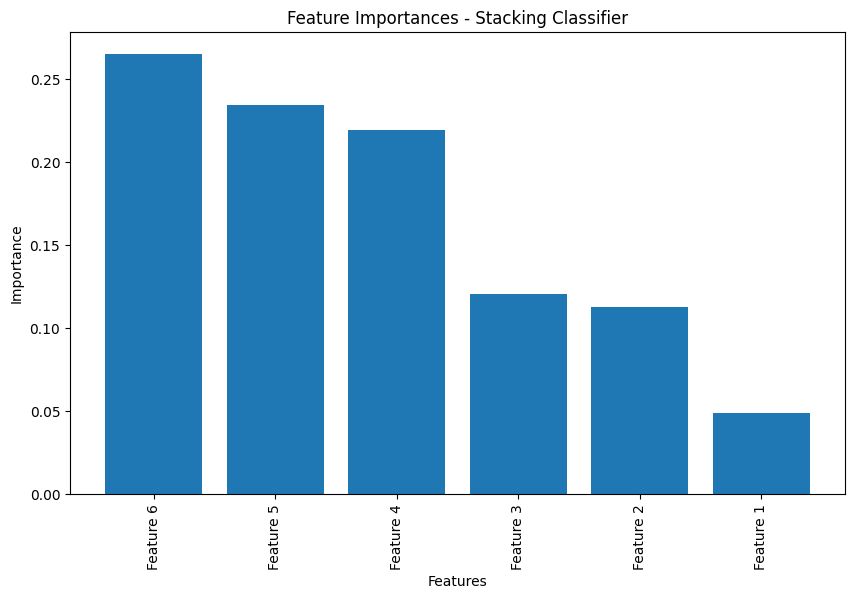

In [19]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42))
stacking_model.fit(X_resampled, y_resampled)

# Feature Importances for Stacking Classifier
feature_importances_stack = stacking_model.final_estimator_.feature_importances_
feature_names_stack = [f"Feature {i+1}" for i in range(len(feature_importances_stack))]
sorted_idx_stack = feature_importances_stack.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances_stack)), feature_importances_stack[sorted_idx_stack], align="center")
plt.xticks(range(len(feature_importances_stack)), [feature_names_stack[i] for i in sorted_idx_stack], rotation='vertical')
plt.title("Feature Importances - Stacking Classifier")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
